# Box 2: ACC, high EKE

In [1]:
import xarray as xr
import numpy as np
import gsw
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
from cmocean import cm as cmo
import xrft
import pandas as pd


import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import MLD_funcs as mf

In [2]:
reload(df)
reload(ef)
reload(ff)
reload(pf)
reload(mf)

<module 'MLD_funcs' from '/home.ufs/amf2288/argo-intern/MLD_funcs.py'>

## Select and Plot Box

In [4]:
box_z = xr.open_dataset('202206_boxes/lon:(-55,-45)_lat:(-45,-35)_ds_z.nc')

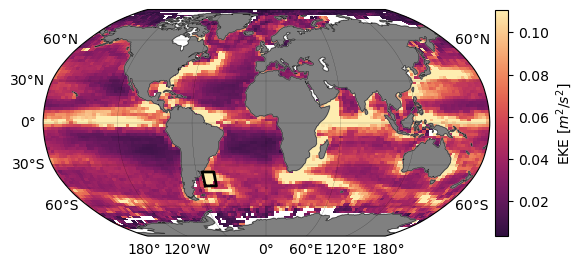

In [5]:
pf.plot_box([[-55,-45,-45,-35]])

In [6]:
box_z = mf.get_MLD(box_z)
box_z = mf.add_times(box_z)

Text(0, 0.5, 'freq')

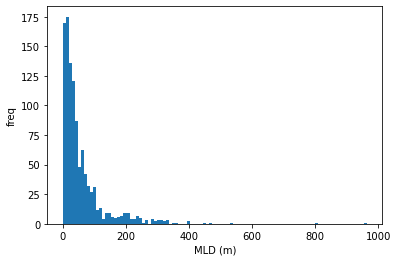

In [7]:
plt.hist(box_z.MLD,bins=100)
plt.xlabel('MLD (m)')
plt.ylabel('freq')

Text(0.5, 1.0, 'Fractional Months & Years')

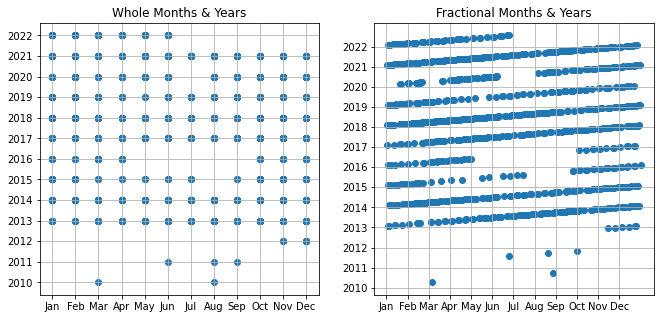

In [10]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
plt.scatter(box_z.month,box_z.year)
plt.yticks(range(2010,2023),range(2010,2023))
plt.xticks(range(1,13),months)
plt.grid()
plt.title('Whole Months & Years')

plt.subplot(1,2,2)
plt.scatter(box_z.month_frac,box_z.year_frac)
plt.yticks(range(2010,2023),range(2010,2023))
plt.xticks(range(1,13),months)
plt.grid()
plt.title('Fractional Months & Years')

## Plot Tracers and Profiles

In [11]:
n=0
mean_prof = box_z.SPICE.isel(PRES_INTERPOLATED=n).mean(skipna=True)
this_prof = box_z.SPICE.isel(PRES_INTERPOLATED=n) - mean_prof

for n in range(1,len(box_z.PRES_INTERPOLATED)):
    mean_prof      = box_z.SPICE.isel(PRES_INTERPOLATED=n).mean(skipna=True)
    this_prof_next = box_z.SPICE.isel(PRES_INTERPOLATED=n) - mean_prof

    this_prof = xr.concat([this_prof, this_prof_next], dim='PRES_INTERPOLATED')
    
SPICE_anom = this_prof

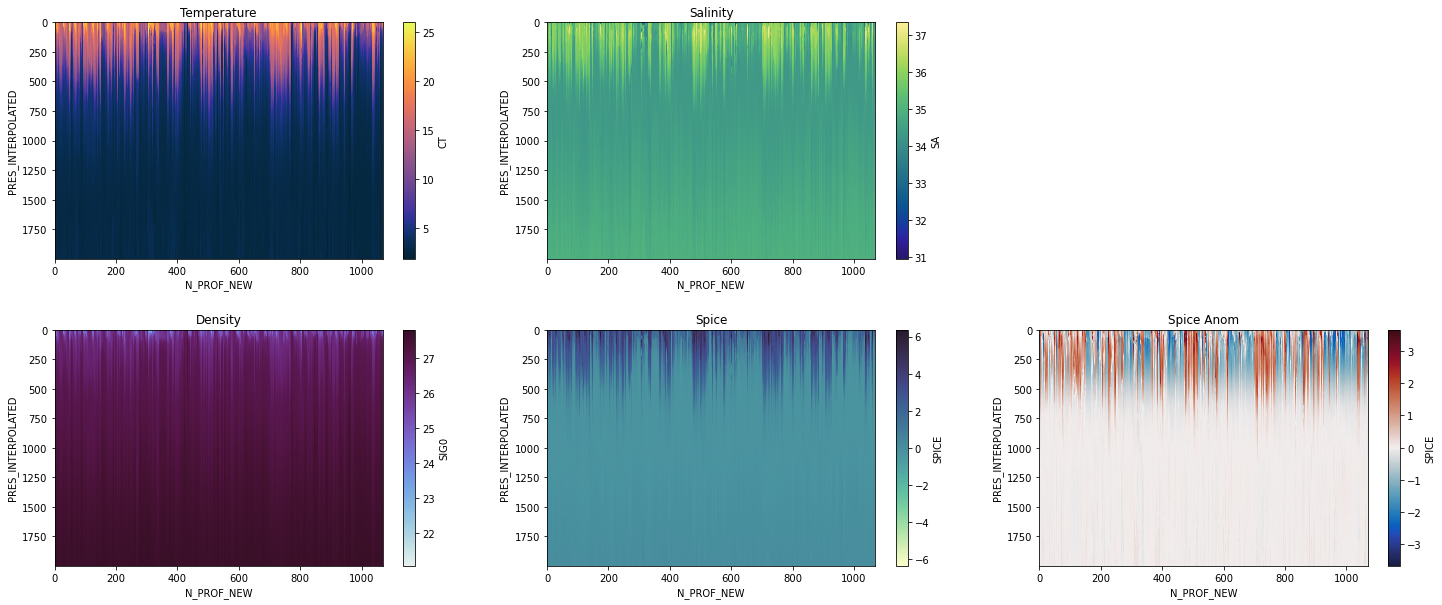

In [12]:
plt.figure(figsize=(25,10))

plt.subplot(2,3,1)
box_z.CT.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',cmap=cmo.thermal)
plt.gca().invert_yaxis()
plt.title('Temperature')

plt.subplot(2,3,2)
box_z.SA.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',cmap=cmo.haline)
plt.gca().invert_yaxis()
plt.title('Salinity')

plt.subplot(2,3,4)
box_z.SIG0.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',cmap=cmo.dense)
plt.gca().invert_yaxis()
plt.title('Density')

plt.subplot(2,3,5)
box_z.SPICE.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',cmap=cmo.deep)
plt.gca().invert_yaxis()
plt.title('Spice')

plt.subplot(2,3,6)
SPICE_anom.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',cmap=cmo.balance)
plt.gca().invert_yaxis()
plt.title('Spice Anom')

plt.subplots_adjust(hspace=0.3)